
<h1 align="center" > 模式识别实验报告 <span class="tocSkip"></span></h1>
<h2 align="center"> <a href="https://github.com/jianduo1/Report-of-Pattern-Recognition" >Report of Pattern Recognition</a>  <span class="tocSkip"></span></h2>
<img src="xiaohui.jpg" , width=300, height=300>
<h3 align="center"> 学院: 自动化学院  <span class="tocSkip"></span></h3>
<h3 align="center"> 班级: 智能 1702<span class="tocSkip"></span></h3>
<h3 align="center"> 指导老师: 高琰<span class="tocSkip"></span></h3>
<h3 align="center"> 作者 : 黄坚铎<span class="tocSkip"></span></h3>

<h1></h1>
<h2></h2>

<table style="margin-left:50 ;margin-top:100;font-family:宋体;color:black;font-size:24px;text-align:left">
<caption style="text-align:center">目 录 表</caption>
<tr>
<td>第一部分</td>
<td><a href="#一、实验介绍" >实验介绍</a></td>
</tr>
<tr>
<td>第二部分</td>
<td><a href="#二、实验一" >实验一</a></td>
</tr>
<tr>
<td>第三部分</td>
<td><a href="#三、实验二" >实验二</a></td>
</tr>
<tr>
<td>第四部分</td>
<td><a href="#四、实验三" >实验三</a></td>
</tr>
<tr>
<td>第五部分</td>
<td><a href="#五、实验四" >实验四</a></td>
</tr>
<tr>
<td>第六部分</td>
<td><a href="#六、实验总结" >实验总结</a></td>
</tr>
</table>

# 一、实验介绍
## 1.实验内容
<table style="font-family:宋体;color:black;font-size:15px;text-align:center">
<caption style="text-align:center">【实验内容】</caption>
<tr>
<td>实验一</td>
<td style="text-align:center">运行银行存款预测实例，使用ModelArts平台上的自动学习功能，预测某个客户是否会办理存款业务。</td>
</tr>
<tr>
<td>实验二</td>
<td style="text-align:center">运行实例文件，使用Notebook训练模型并预测手写字符识别。</td>
</tr>
<tr>
<td>实验三</td>
<td style="text-align:center">在ModelArts平台的notebook中编写程序，调用SVM算法实现写字符识别，需要考虑参数的影响。同时与实验2的结果进行比较</td>
</tr>
<tr>
<td>实验四</td>
<td style="text-align:center">利用实验4中的数据，在notebook中实现kmeans算法对客户进行分群，分群结果可视化。</td>
</tr>
</table>

## 2.实验平台
<table style="font-family:宋体;color:black;font-size:15px;text-align:center">
<caption style="text-align:center">【实验平台】</caption>
<tr>
<td>华为云</td>
<td style="text-align:center">modelarts平台</td>
</tr>
<tr>
<td>笔记本电脑</td>
<td style="text-align:center">i5-7300，NVIDIA GTX1050，TensorFlow v1.14</td>
</tr>
</table>

# 二、实验一

# 三、实验二 

# 四、实验三 

In [ ]:
"""
svm的smo算法实现
"""
from __future__ import print_function
from numpy import *
from  numba import jit,jitclass, float64,int64,int32,njit
import matplotlib.pyplot as plt
import time
import os

def convert_to_img(root = "./Mnist-Data-Set/",type = "jpg"):
    #获取数据：将train-images-idx3-ubyte转化为28*28的jpg或txt 
    # 例子：convert_to_img(type = "txt")
    import torchvision.datasets.mnist as mnist
    from skimage import io
    # 源文件./Mnist-Data-Set/train-images-idx3-ubyte等四个
    train_set = (
        mnist.read_image_file(os.path.join(root, 'train-images-idx3-ubyte')),
        mnist.read_label_file(os.path.join(root, 'train-labels-idx1-ubyte')))
    test_set = (
        mnist.read_image_file(os.path.join(root,'t10k-images-idx3-ubyte')),
        mnist.read_label_file(os.path.join(root,'t10k-labels-idx1-ubyte')))  
    print("train set:", train_set[0].size())
    print("test set:", test_set[0].size())
    

    file ={"jpg":['train/','test/'],"txt":['train2/','test2/']}
    data =[[train_set[0], train_set[1]],[test_set[0], test_set[1]]]
    for i in arange(2):
        train_path = root + file[type][i]
        if(not os.path.exists(train_path)):
            os.makedirs(train_path)
        for i, (img, label) in enumerate(zip(data[i][0],data[i][1])):  
            int_label = str(label).replace('tensor(', '').replace(')', '')
            img_path = train_path +int_label+"_"+ str(i) + '.txt'
            if type == "jpg":
                io.imsave(img_path, img.numpy())
            elif type == "txt":
                img = np.int32(img.numpy()>0)
                savetxt(img_path,img,fmt='%d',delimiter='')

@njit
def kernelTrans(X, rowData, kTup = ('rbf', 10), calcError = False):  # calc the kernel or transform data to a higher dimensional space
#     start = time.clock()
    """
    核转换函数
    Args:
        X     data数据集
        A     data数据集的第i行的数据
        kTup  核函数的信息(rbf',gamma)
    Returns:
    """
    row ,col = shape(X)
    if calcError:
        iter = 1
        K = zeros((row, 1))
    else:
        iter = row
        K = zeros((row, row))
    # 迭代
    for i in range(iter):
#         start = time.clock()
        if calcError:
            A = rowData
        else:
            A=X[i, :]
#         row, n = shape(X)# 402 1024
        K1 = zeros((row, 1))#402 1

        if kTup[0] == 'lin':
            # linear kernel:   m*n * n*1 = m*1
            K[:, i] = X .dot( A.T)
        elif kTup[0] == 'rbf':
#             start = time.clock()
            for j in range(row):
                deltaRow = X[j, :] - A
                K1[j] = deltaRow .dot( deltaRow.T)
            K[:, i] = exp(K1 / (-1 * kTup[1] ** 2)).reshape(row)# 径向基函数的高斯版本
        else:
            raise NameError('The Kernel is not recognized')\
    #     print(shape(K))
#         print(time.clock()-start)
        #打印时间
#         if (i%1000==0) and (not calcError):
#             print(i,time.clock()-start)
#             start = time.clock()
    return K

spec = [ 
    ('X', float64[:,:]),  
    ('labels', int32[:]),
    ('C', float64),  
    ('tol', float64),  
    ('row', int64),  
    ('alphas', float64[:,:]),  
    ('b', float64[:]),  
    ('eCache', float64[:,:]),  
    ('K', float64[:,:])]
@jitclass(spec)
class optStruct(object):
    """
    建立的数据结构来保存所有的重要值
    """
    def __init__(self, data, labels, C, toler, kTup):
        """
        Args:
            data    数据集
            labels  类别标签
            C   松弛变量，惩罚因子(常量值)，允许有些数据点可以处于分隔面的错误一侧。
                控制最大化间隔和保证大部分的函数间隔小于1.0这两个目标的权重。
                可以通过调节该参数达到不同的结果。
            toler   容错率
            kTup    包含核函数信息的元组
        """
        #  print(type(self.labels),type(self.X),type(self.C),type(self.tol),type(self.row),type(self.alphas),type(self.b),type(self.eCache),type(self.K))
        
        self.X = data
        self.labels = labels
        self.C = C
        self.tol = toler
        self.row = shape(data)[0]# 数据的行数
        self.alphas = zeros((self.row, 1))
        self.b = zeros(1)
        # 误差缓存，第一列给出的是eCache是否有效的标志位，第二列给出的是实际的E值。
        self.eCache = zeros((self.row, 2))
        # m行m列的矩阵
        self.K = zeros((self.row, self.row))
        
@jit
def calcEk(oS, k):
    """calcEk（求 Ek误差：预测值-真实值的差）
    该过程在完整版的SMO算法中陪出现次数较多，因此将其单独作为一个方法
    Args:
        oS  optStruct对象
        k   具体的某一行
    Returns:
        Ek  预测结果与真实结果比对，计算误差Ek
    """
    fXk = float( multiply(oS.alphas,oS.labels.reshape(-1,1)).T.dot(oS.K[:, k])+ oS.b)
    Ek = fXk - float(oS.labels[k])
    return Ek

@jit
def selectJ(i, oS, Ei):  # this is the second choice -heurstic, and calcs Ej这是第二选择-启发式，并计算Ej
    """selectJ（返回最优的j和Ej）
    内循环的启发式方法。
    选择第二个(内循环)alpha的alpha值
    这里的目标是选择合适的第二个alpha值以保证每次优化中采用最大步长。
    该函数的误差与第一个alpha值Ei和下标i有关。
    Args:
        i   具体的第i一行
        oS  optStruct对象
        Ei  预测结果与真实结果比对，计算误差Ei
    Returns:
        j  随机选出的第j一行
        Ej 预测结果与真实结果比对，计算误差Ej
    """
    maxK = -1
    maxDeltaE = 0
    Ej = 0
    # 首先将输入值Ei在缓存中设置成为有效的。这里的有效意味着它已经计算好了。
    oS.eCache[i] = [1, Ei]

    # print 'oS.eCache[%s]=%s' % (i, oS.eCache[i])
    # print 'oS.eCache[:, 0].A=%s' % oS.eCache[:, 0].A.T
    # """
    # # 返回非0的：行列值
    # nonzero(oS.eCache[:, 0].A)= (
    #     行： array([ 0,  2,  4,  5,  8, 10, 17, 18, 20, 21, 23, 25, 26, 29, 30, 39, 46,52, 54, 55, 62, 69, 70, 76, 79, 82, 94, 97]), 
    #     列： array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0])
    # )
    # """
    # print 'nonzero(oS.eCache[:, 0].A)=', nonzero(oS.eCache[:, 0].A)
    # # 取行的list
    # print 'nonzero(oS.eCache[:, 0].A)[0]=', nonzero(oS.eCache[:, 0].A)[0]
    # 非零E值的行的list列表，所对应的alpha值
    validEcacheList = nonzero(oS.eCache[:, 0])[0]
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:  # 在所有的值上进行循环，并选择其中使得改变最大的那个值
            if k == i:
                continue  # don't calc for i, waste of time

            # 求 Ek误差：预测值-真实值的差
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                # 选择具有最大步长的j
                maxK = k
                maxDeltaE = deltaE
                Ej = Ek
        return maxK, Ej
    else:  # 如果是第一次循环，则随机选择一个alpha值
#         j = selectJrand(i, oS.row)
        j = 0#j  为一个不为i的随机数，在0~m之间的整数值
        while j == i:
            j = int(random.uniform(0, oS.row))
        
        # 求 Ek误差：预测值-真实值的差
        Ej = calcEk(oS, j)
    return j, Ej
@jit
def updateEk(oS, k):
    """updateEk（计算误差值并存入缓存中。）
    在对alpha值进行优化之后会用到这个值。
    Args:
        oS  optStruct对象
        k   某一列的行号
    """

    # 求 误差：预测值-真实值的差
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1, Ek]
 
@jit
def innerL(i, oS):
    """innerL
    内循环代码
    Args:
        i   具体的某一行
        oS  optStruct对象
    Returns:
        0   找不到最优的值
        1   找到了最优的值，并且oS.Cache到缓存中
    """

    # 求 Ek误差：预测值-真实值的差
    Ei = calcEk(oS, i)
    # 约束条件 (KKT条件是解决最优化问题的时用到的一种方法。我们这里提到的最优化问题通常是指对于给定的某一函数，求其在指定作用域上的全局最小值)
    # 0<=alphas[i]<=C，但由于0和C是边界值，我们无法进行优化，因为需要增加一个alphas和降低一个alphas。
    # 表示发生错误的概率：labels[i]*Ei 如果超出了 toler， 才需要优化。至于正负号，我们考虑绝对值就对了。
    '''
    # 检验训练样本(xi, yi)是否满足KKT条件
    yi*f(i) >= 1 and alpha = 0 (outside the boundary)
    yi*f(i) == 1 and 0<alpha< C (on the boundary)
    yi*f(i) <= 1 and alpha = C (between the boundary)
    '''
    if ((oS.labels[i] * Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labels[i] * Ei > oS.tol) and (oS.alphas[i] > 0)):
        # 选择最大的误差对应的j进行优化。效果更明显
        j, Ej = selectJ(i, oS, Ei)
        alphaIold = oS.alphas[i].copy()
        alphaJold = oS.alphas[j].copy()
        H = zeros((1, 1))
        L = zeros((1, 1))
        # L和H用于将alphas[j]调整到0-C之间。如果L==H，就不做任何改变，直接return 0
        if (oS.labels[i] != oS.labels[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L == H:
            # print("L==H")
            return 0

        # eta是alphas[j]的最优修改量，如果eta==0，需要退出for循环的当前迭代过程
        # 参考《统计学习方法》李航-P125~P128<序列最小最优化算法>
        eta = 2.0 * oS.K[i, j] - oS.K[i, i] - oS.K[j, j]  # changed for kernel
        if eta >= 0:
            print("eta>=0")
            return 0

        # 计算出一个新的alphas[j]值
        oS.alphas[j] -= oS.labels[j] * (Ei - Ej) / eta
        # 并使用辅助函数，以及L和H对其进行调整
        if L > oS.alphas[j] : oS.alphas[j] = L
        if oS.alphas[j] > H : oS.alphas[j] = H
#         oS.alphas[j] = clipAlpha(oS.alphas[j], H, L)
        # 更新误差缓存
        updateEk(oS, j)

        # 检查alpha[j]是否只是轻微的改变，如果是的话，就退出for循环。
        if (abs(oS.alphas[j] - alphaJold) < 0.00001):
            # print("j not moving enough")
            return 0

        # 然后alphas[i]和alphas[j]同样进行改变，虽然改变的大小一样，但是改变的方向正好相反
        oS.alphas[i] += oS.labels[j] * oS.labels[i] * (alphaJold - oS.alphas[j])
        # 更新误差缓存
        updateEk(oS, i)

        # 在对alpha[i], alpha[j] 进行优化之后，给这两个alpha值设置一个常数b。
        # w= Σ[1~n] ai*yi*xi => b = yi- Σ[1~n] ai*yi(xi*xj)
        # 所以：  b1 - b = (y1-y) - Σ[1~n] yi*(a1-a)*(xi*x1)
        # 为什么减2遍？ 因为是 减去Σ[1~n]，正好2个变量i和j，所以减2遍
        b1 = oS.b - Ei - oS.labels[i] * (oS.alphas[i] - alphaIold) * oS.K[i, i] - oS.labels[j] * (oS.alphas[j] - alphaJold) * oS.K[i, j]
        b2 = oS.b - Ej - oS.labels[i] * (oS.alphas[i] - alphaIold) * oS.K[i, j] - oS.labels[j] * (oS.alphas[j] - alphaJold) * oS.K[j, j]

        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]):
            oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]):
            oS.b = b2
        else:
            oS.b = (b1 + b2) / 2.0
        return 1
    else:
        return 0

@jit
def smoP(data, Labels, C, toler, maxIter, kTup=('rbf', 10)):
    """
    完整SMO算法外循环，与smoSimple有些类似，但这里的循环退出条件更多一些
    Args:
        data    数据集
        Labels  类别标签
        C   松弛变量(常量值)，允许有些数据点可以处于分隔面的错误一侧。
            控制最大化间隔和保证大部分的函数间隔小于1.0这两个目标的权重。
            可以通过调节该参数达到不同的结果。
        toler   容错率
        maxIter 退出前最大的循环次数
        kTup    包含核函数信息的元组
    Returns:
        b       模型的常量值
        alphas  拉格朗日乘子
    """
    # 创建一个 optStruct 对象
    start = time.clock()
    oS = optStruct(data, Labels.T, C, toler, kTup)
#    print(shape(kernelTrans(oS.row, None,kTup)))
#    
    oS.K = kernelTrans(data, None)
    print("@@Time used:",time.clock() - start)
    iter = 0
    entireSet = True
    alphaPairsChanged = zeros(1,dtype=float)

    # 循环遍历：循环maxIter次 并且 （alphaPairsChanged存在可以改变 or 所有行遍历一遍）
    start = time.clock()
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        iter_start = time.clock()
        alphaPairsChanged = 0
        
        #  当entireSet=true or 非边界alpha对没有了；就开始寻找 alpha对，然后决定是否要进行else。
        if entireSet:
            # 在数据集上遍历所有可能的alpha
            for i in range(oS.row):
                # 是否存在alpha对，存在就+1
                alphaPairsChanged += innerL(i, oS)
                if(i%1000==0):
                    print("fullSet    iter:%d i:%d  pairs changed %d" % (iter+1, i, alphaPairsChanged))
            print("fullSet    iter:%d  i:%d  pairs changed %d" % (iter+1, oS.row, alphaPairsChanged))
            iter += 1

        # 对已存在 alpha对，选出非边界的alpha值，进行优化。
        else:
            # 遍历所有的非边界alpha值，也就是不在边界0或C上的值。
            nonBoundIs = nonzero((oS.alphas > 0) * (oS.alphas < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i, oS)
                if i%100==0:
                    print("non-bound, iter:%d  i:%d  pairs changed %d" % (iter+1, i, alphaPairsChanged))
            print("non-bound, iter:%d  i:%d  pairs changed %d" % (iter+1, nonBoundIs.shape[0], alphaPairsChanged))
            iter += 1

        # 如果找到alpha对，就优化非边界alpha值，否则，就重新进行寻找，如果寻找一遍 遍历所有的行还是没找到，就退出循环。
        if entireSet:
            entireSet = False  # toggle entire set loop
        elif (alphaPairsChanged == 0):
            entireSet = True
        print("iteration number: " , iter,"Time used:",time.clock() - iter_start,"\n")
        
    print("@@Time used:",time.clock() - start)
    return oS.b, oS.alphas


def img2vector(filename,ImgSize=32):
    from PIL import Image
    returnVect = zeros((1, ImgSize*ImgSize))
    if filename.split('.')[-1] == 'txt':
        fr = open(filename)
        for row in range(ImgSize):
            lineStr = fr.readline()
            for col in range(ImgSize):
                returnVect[0, ImgSize * row + col] = int(lineStr[col])
    elif filename.split('.')[-1] == 'jpg':
        fr = array(Image.open(filename), dtype= "float64")
        fr = fr.flatten()
        for i in range(ImgSize*ImgSize):
            returnVect[0, i] = fr[i]
    else:
        print("format=='txt' or 'jpg'")
    return returnVect

def loadImages(dirName='data/6.SVM/testDigits',ImgSize=32,Pos=[1],Neg=[9]):
    from os import listdir
    import time
    start = time.clock()
    
    trainingFileList = listdir(dirName)
    DataSize = len(trainingFileList)
    # Labels
    hwLabels = []
    for i in range(DataSize):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt/jpg
        classNumStr = int(fileStr.split('_')[0])
        if classNumStr in Neg:
            hwLabels.append(-1)
        elif classNumStr in Pos:
            hwLabels.append(1)
    # Data
    trainingMat = zeros((len(hwLabels), ImgSize*ImgSize))
    for i in range(len(hwLabels)):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt/jpg
        classNumStr = int(fileStr.split('_')[0])
        trainingMat[i, :] = img2vector('%s/%s' % (dirName, fileNameStr),ImgSize=ImgSize)
    
    print("                                                   Data:",
          len(trainingMat),len(trainingMat[0]),"Labels:",len(hwLabels),"@@Time used:",time.clock() - start)
    return trainingMat, array(hwLabels)

#@jit
def SVM_mnist(kTup=('rbf', 10)):
    from sklearn.decomposition import PCA  
    import random
    print("SVM_mnist->smoP->optStruct,innerL->kernelTrans")
    #1.导入数据 ：PCA，sample
# 0.011576099997910205 #  0.003007700000011937#0.0013792999999964195#0.0019671000009111594
#     trainDat, trainLabel = loadImages('data/6.SVM/trainingDigits')
#     testDat, testLabel = loadImages('data/6.SVM/testDigits')
# 0.3561083000022336 #  0.08955109999999422 0.042489699997531716
    trainDat, trainLabel = loadImages(dirName='Mnist-Data-Set/train2/',ImgSize=28)
    testDat, testLabel = loadImages(dirName='Mnist-Data-Set/test2/',ImgSize=28)
    trainRow,trainCol = shape(trainDat)
    testRow,testCol = shape(testDat)
    print("before pca;dim:{0},train:{1},test:{2}".format(trainCol,trainRow,testRow))
#     # PCA降维
#     pca = PCA(n_components=100)#n_components=2,0.8
#     pca.fit(trainDat)
#     trainDat = pca.transform(trainDat)
#     pca.fit(testDat)
#     testDat = pca.transform(testDat)
#     trainRow,trainCol = shape(trainDat)
#     testRow, testCol = shape(testDat)
#     print("after pca;dim:{0},train:{1},test:{2}".format(trainCol,trainRow,testRow))
# # #      取小样本
#     trainRowTmp = 1000#1000->4min
#     testRowTmp = 150
#     idx=[False]*trainRow
#     for i in random.sample(range(0,trainRow), trainRowTmp):
#         idx[i]= True
#     trainDat, trainLabel = trainDat[idx],trainLabel[idx]
#     idx=[False]*testRow
#     for i in random.sample(range(0,testRow), testRowTmp):
#         idx[i]= True
#     testDat, testLabel = testDat[idx],testLabel[idx]
#     trainRow,trainCol = shape(trainDat)
#     testRow, testCol = shape(testDat)
#     print("sample;dim:{0},train:{1},test:{2}".format(trainCol,trainRow,testRow))

    
    # 2. 训练模型
    #smo算法，b, alphas
#     print(type(trainLabel),trainLabel)
    b, alphas = smoP(trainDat, trainLabel, C=200.0, toler=0.0001, maxIter=10000, kTup=('lin', 10))#alphas row*1
    svInd = nonzero(alphas > 0)[0]#(row,)
    sVs = trainDat[svInd]#(row,1024)
    labelSV = trainLabel[svInd].reshape(-1,1)# (row,1)
#     print(shape(svInd),shape(sVs),shape(labelSV),"******************************************")
    print("there are %d Support Vectors" % shape(sVs)[0])
    
    # 3. 计算训练数据,测试数据误差
    errorCount = 0
    for i in range(trainRow):
        kernelEval = kernelTrans(sVs, trainDat[i, :], kTup, calcError = True)
        # 1*m * m*1 = 1*1 单个预测结果(132, 1) (132, 1) (402, 1)
#         print(shape(kernelEval),shape(labelSV),shape(alphas))
        predict = kernelEval.T.dot(multiply(labelSV, alphas[svInd])) + b
#        print(shape(predict),shape(trainLabel))#(1, 1) (2000,)
        if sign(predict[0]) != sign(trainLabel[i]): errorCount += 1
    print("the training error rate is: %f" % (float(errorCount) / trainRow))
    errorCount = 0
    for i in range(testRow):
        kernelEval = kernelTrans(sVs, testDat[i, :], kTup, calcError = True)
        predict = kernelEval.T.dot(multiply(labelSV, alphas[svInd])) + b
        if sign(predict) != sign(testLabel[i]): errorCount += 1
    print("the test error rate is: %f" % (float(errorCount) / testRow))

     
if __name__ == "__main__":
     SVM_mnist() # 0.005376 
    # SVM_mnist(('lin'))

In [ ]:
"""
svm的smo算法实现
"""
from __future__ import print_function
from numpy import *
from  numba import jit,jitclass, float64,int64,int32,njit
import matplotlib.pyplot as plt
import time
import os

def convert_to_img(root = "./Mnist-Data-Set/",type = "jpg"):
    #获取数据：将train-images-idx3-ubyte转化为28*28的jpg或txt 
    # 例子：convert_to_img(type = "txt")
    import torchvision.datasets.mnist as mnist
    from skimage import io
    # 源文件./Mnist-Data-Set/train-images-idx3-ubyte等四个
    train_set = (
        mnist.read_image_file(os.path.join(root, 'train-images-idx3-ubyte')),
        mnist.read_label_file(os.path.join(root, 'train-labels-idx1-ubyte')))
    test_set = (
        mnist.read_image_file(os.path.join(root,'t10k-images-idx3-ubyte')),
        mnist.read_label_file(os.path.join(root,'t10k-labels-idx1-ubyte')))  
    print("train set:", train_set[0].size())
    print("test set:", test_set[0].size())
    

    file ={"jpg":['train/','test/'],"txt":['train2/','test2/']}
    data =[[train_set[0], train_set[1]],[test_set[0], test_set[1]]]
    for i in arange(2):
        train_path = root + file[type][i]
        if(not os.path.exists(train_path)):
            os.makedirs(train_path)
        for i, (img, label) in enumerate(zip(data[i][0],data[i][1])):  
            int_label = str(label).replace('tensor(', '').replace(')', '')
            img_path = train_path +int_label+"_"+ str(i) + '.txt'
            if type == "jpg":
                io.imsave(img_path, img.numpy())
            elif type == "txt":
                img = np.int32(img.numpy()>0)
                savetxt(img_path,img,fmt='%d',delimiter='')

@jit
def kernelTrans(X, rowData, kTup = ('rbf', 10), calcError = False):  # calc the kernel or transform data to a higher dimensional space
    start = time.clock()
    """
    核转换函数
    Args:
        X     data数据集
        A     data数据集的第i行的数据
        kTup  核函数的信息(rbf',gamma)
    Returns:
    """
    row ,col = shape(X)
    if calcError:
        iter = 1
        K = zeros((row, 1))
    else:
        iter = row
        K = zeros((row, row))
    # 迭代
    for i in range(iter):
#         start = time.clock()
        if calcError:
            A = rowData
        else:
            A=X[i, :]
#         row, n = shape(X)# 402 1024
        K1 = zeros((row, 1))#402 1

        if kTup[0] == 'lin':
            # linear kernel:   m*n * n*1 = m*1
            K[:, i] = X .dot( A.T)
        elif kTup[0] == 'rbf':
            start = time.clock()
            for j in range(row):
                deltaRow = X[j, :] - A
                K1[j] = deltaRow .dot( deltaRow.T)
            K[:, i] = exp(K1 / (-1 * kTup[1] ** 2)).reshape(row)# 径向基函数的高斯版本
        else:
            raise NameError('The Kernel is not recognized')\
    #     print(shape(K))
#         print(time.clock()-start)
        #打印时间
        if (i%1000==0) and (not calcError):
            print(i,time.clock()-start)
            start = time.clock()
    return K

spec = [ 
    ('X', float64[:,:]),  
    ('labels', int32[:]),
    ('C', float64),  
    ('tol', float64),  
    ('row', int64),  
    ('alphas', float64[:,:]),  
    ('b', float64[:]),  
    ('eCache', float64[:,:]),  
    ('K', float64[:,:])]
@jitclass(spec)
class optStruct(object):
    """
    建立的数据结构来保存所有的重要值
    """
    def __init__(self, data, labels, C, toler, kTup):
        """
        Args:
            data    数据集
            labels  类别标签
            C   松弛变量，惩罚因子(常量值)，允许有些数据点可以处于分隔面的错误一侧。
                控制最大化间隔和保证大部分的函数间隔小于1.0这两个目标的权重。
                可以通过调节该参数达到不同的结果。
            toler   容错率
            kTup    包含核函数信息的元组
        """
        #  print(type(self.labels),type(self.X),type(self.C),type(self.tol),type(self.row),type(self.alphas),type(self.b),type(self.eCache),type(self.K))
        
        self.X = data
        self.labels = labels
        self.C = C
        self.tol = toler
        self.row = shape(data)[0]# 数据的行数
        self.alphas = zeros((self.row, 1))
        self.b = zeros(1)
        # 误差缓存，第一列给出的是eCache是否有效的标志位，第二列给出的是实际的E值。
        self.eCache = zeros((self.row, 2))
        # m行m列的矩阵
        self.K = zeros((self.row, self.row))
        
@jit
def calcEk(oS, k):
    """calcEk（求 Ek误差：预测值-真实值的差）
    该过程在完整版的SMO算法中陪出现次数较多，因此将其单独作为一个方法
    Args:
        oS  optStruct对象
        k   具体的某一行
    Returns:
        Ek  预测结果与真实结果比对，计算误差Ek
    """
    fXk = float( multiply(oS.alphas,oS.labels.reshape(-1,1)).T.dot(oS.K[:, k])+ oS.b)
    Ek = fXk - float(oS.labels[k])
    return Ek

@jit
def selectJ(i, oS, Ei):  # this is the second choice -heurstic, and calcs Ej这是第二选择-启发式，并计算Ej
    """selectJ（返回最优的j和Ej）
    内循环的启发式方法。
    选择第二个(内循环)alpha的alpha值
    这里的目标是选择合适的第二个alpha值以保证每次优化中采用最大步长。
    该函数的误差与第一个alpha值Ei和下标i有关。
    Args:
        i   具体的第i一行
        oS  optStruct对象
        Ei  预测结果与真实结果比对，计算误差Ei
    Returns:
        j  随机选出的第j一行
        Ej 预测结果与真实结果比对，计算误差Ej
    """
    maxK = -1
    maxDeltaE = 0
    Ej = 0
    # 首先将输入值Ei在缓存中设置成为有效的。这里的有效意味着它已经计算好了。
    oS.eCache[i] = [1, Ei]

    # print 'oS.eCache[%s]=%s' % (i, oS.eCache[i])
    # print 'oS.eCache[:, 0].A=%s' % oS.eCache[:, 0].A.T
    # """
    # # 返回非0的：行列值
    # nonzero(oS.eCache[:, 0].A)= (
    #     行： array([ 0,  2,  4,  5,  8, 10, 17, 18, 20, 21, 23, 25, 26, 29, 30, 39, 46,52, 54, 55, 62, 69, 70, 76, 79, 82, 94, 97]), 
    #     列： array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0])
    # )
    # """
    # print 'nonzero(oS.eCache[:, 0].A)=', nonzero(oS.eCache[:, 0].A)
    # # 取行的list
    # print 'nonzero(oS.eCache[:, 0].A)[0]=', nonzero(oS.eCache[:, 0].A)[0]
    # 非零E值的行的list列表，所对应的alpha值
    validEcacheList = nonzero(oS.eCache[:, 0])[0]
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:  # 在所有的值上进行循环，并选择其中使得改变最大的那个值
            if k == i:
                continue  # don't calc for i, waste of time

            # 求 Ek误差：预测值-真实值的差
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                # 选择具有最大步长的j
                maxK = k
                maxDeltaE = deltaE
                Ej = Ek
        return maxK, Ej
    else:  # 如果是第一次循环，则随机选择一个alpha值
#         j = selectJrand(i, oS.row)
        j = 0#j  为一个不为i的随机数，在0~m之间的整数值
        while j == i:
            j = int(random.uniform(0, oS.row))
        
        # 求 Ek误差：预测值-真实值的差
        Ej = calcEk(oS, j)
    return j, Ej
@jit
def updateEk(oS, k):
    """updateEk（计算误差值并存入缓存中。）
    在对alpha值进行优化之后会用到这个值。
    Args:
        oS  optStruct对象
        k   某一列的行号
    """

    # 求 误差：预测值-真实值的差
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1, Ek]
 
@jit
def innerL(i, oS):
    """innerL
    内循环代码
    Args:
        i   具体的某一行
        oS  optStruct对象
    Returns:
        0   找不到最优的值
        1   找到了最优的值，并且oS.Cache到缓存中
    """

    # 求 Ek误差：预测值-真实值的差
    Ei = calcEk(oS, i)
    # 约束条件 (KKT条件是解决最优化问题的时用到的一种方法。我们这里提到的最优化问题通常是指对于给定的某一函数，求其在指定作用域上的全局最小值)
    # 0<=alphas[i]<=C，但由于0和C是边界值，我们无法进行优化，因为需要增加一个alphas和降低一个alphas。
    # 表示发生错误的概率：labels[i]*Ei 如果超出了 toler， 才需要优化。至于正负号，我们考虑绝对值就对了。
    '''
    # 检验训练样本(xi, yi)是否满足KKT条件
    yi*f(i) >= 1 and alpha = 0 (outside the boundary)
    yi*f(i) == 1 and 0<alpha< C (on the boundary)
    yi*f(i) <= 1 and alpha = C (between the boundary)
    '''
    if ((oS.labels[i] * Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labels[i] * Ei > oS.tol) and (oS.alphas[i] > 0)):
        # 选择最大的误差对应的j进行优化。效果更明显
        j, Ej = selectJ(i, oS, Ei)
        alphaIold = oS.alphas[i].copy()
        alphaJold = oS.alphas[j].copy()
        H = zeros((1, 1))
        L = zeros((1, 1))
        # L和H用于将alphas[j]调整到0-C之间。如果L==H，就不做任何改变，直接return 0
        if (oS.labels[i] != oS.labels[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L == H:
            # print("L==H")
            return 0

        # eta是alphas[j]的最优修改量，如果eta==0，需要退出for循环的当前迭代过程
        # 参考《统计学习方法》李航-P125~P128<序列最小最优化算法>
        eta = 2.0 * oS.K[i, j] - oS.K[i, i] - oS.K[j, j]  # changed for kernel
        if eta >= 0:
            print("eta>=0")
            return 0

        # 计算出一个新的alphas[j]值
        oS.alphas[j] -= oS.labels[j] * (Ei - Ej) / eta
        # 并使用辅助函数，以及L和H对其进行调整
        if L > oS.alphas[j] : oS.alphas[j] = L
        if oS.alphas[j] > H : oS.alphas[j] = H
#         oS.alphas[j] = clipAlpha(oS.alphas[j], H, L)
        # 更新误差缓存
        updateEk(oS, j)

        # 检查alpha[j]是否只是轻微的改变，如果是的话，就退出for循环。
        if (abs(oS.alphas[j] - alphaJold) < 0.00001):
            # print("j not moving enough")
            return 0

        # 然后alphas[i]和alphas[j]同样进行改变，虽然改变的大小一样，但是改变的方向正好相反
        oS.alphas[i] += oS.labels[j] * oS.labels[i] * (alphaJold - oS.alphas[j])
        # 更新误差缓存
        updateEk(oS, i)

        # 在对alpha[i], alpha[j] 进行优化之后，给这两个alpha值设置一个常数b。
        # w= Σ[1~n] ai*yi*xi => b = yi- Σ[1~n] ai*yi(xi*xj)
        # 所以：  b1 - b = (y1-y) - Σ[1~n] yi*(a1-a)*(xi*x1)
        # 为什么减2遍？ 因为是 减去Σ[1~n]，正好2个变量i和j，所以减2遍
        b1 = oS.b - Ei - oS.labels[i] * (oS.alphas[i] - alphaIold) * oS.K[i, i] - oS.labels[j] * (oS.alphas[j] - alphaJold) * oS.K[i, j]
        b2 = oS.b - Ej - oS.labels[i] * (oS.alphas[i] - alphaIold) * oS.K[i, j] - oS.labels[j] * (oS.alphas[j] - alphaJold) * oS.K[j, j]

        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]):
            oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]):
            oS.b = b2
        else:
            oS.b = (b1 + b2) / 2.0
        return 1
    else:
        return 0

@jit
def smoP(data, Labels, C, toler, maxIter, kTup=('rbf', 10)):
    """
    完整SMO算法外循环，与smoSimple有些类似，但这里的循环退出条件更多一些
    Args:
        data    数据集
        Labels  类别标签
        C   松弛变量(常量值)，允许有些数据点可以处于分隔面的错误一侧。
            控制最大化间隔和保证大部分的函数间隔小于1.0这两个目标的权重。
            可以通过调节该参数达到不同的结果。
        toler   容错率
        maxIter 退出前最大的循环次数
        kTup    包含核函数信息的元组
    Returns:
        b       模型的常量值
        alphas  拉格朗日乘子
    """
    # 创建一个 optStruct 对象
    start = time.clock()
    oS = optStruct(data, Labels.T, C, toler, kTup)
#    print(shape(kernelTrans(oS.row, None,kTup)))
#    
    oS.K = kernelTrans(data, None)
    print("@@Time used:",time.clock() - start)
    iter = 0
    entireSet = True
    alphaPairsChanged = zeros(1,dtype=float)

    # 循环遍历：循环maxIter次 并且 （alphaPairsChanged存在可以改变 or 所有行遍历一遍）
    start = time.clock()
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        iter_start = time.clock()
        alphaPairsChanged = 0
        
        #  当entireSet=true or 非边界alpha对没有了；就开始寻找 alpha对，然后决定是否要进行else。
        if entireSet:
            # 在数据集上遍历所有可能的alpha
            for i in range(oS.row):
                # 是否存在alpha对，存在就+1
                alphaPairsChanged += innerL(i, oS)
                if(i%1000==0):
                    print("fullSet    iter:%d i:%d  pairs changed %d" % (iter+1, i, alphaPairsChanged))
            print("fullSet    iter:%d  i:%d  pairs changed %d" % (iter+1, oS.row, alphaPairsChanged))
            iter += 1

        # 对已存在 alpha对，选出非边界的alpha值，进行优化。
        else:
            # 遍历所有的非边界alpha值，也就是不在边界0或C上的值。
            nonBoundIs = nonzero((oS.alphas > 0) * (oS.alphas < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i, oS)
                if i%100==0:
                    print("non-bound, iter:%d  i:%d  pairs changed %d" % (iter+1, i, alphaPairsChanged))
            print("non-bound, iter:%d  i:%d  pairs changed %d" % (iter+1, nonBoundIs.shape[0], alphaPairsChanged))
            iter += 1

        # 如果找到alpha对，就优化非边界alpha值，否则，就重新进行寻找，如果寻找一遍 遍历所有的行还是没找到，就退出循环。
        if entireSet:
            entireSet = False  # toggle entire set loop
        elif (alphaPairsChanged == 0):
            entireSet = True
        print("iteration number: " , iter,"Time used:",time.clock() - iter_start,"\n")
        
    print("@@Time used:",time.clock() - start)
    return oS.b, oS.alphas


def img2vector(filename,ImgSize=32):
    from PIL import Image
    returnVect = zeros((1, ImgSize*ImgSize))
    if filename.split('.')[-1] == 'txt':
        fr = open(filename)
        for row in range(ImgSize):
            lineStr = fr.readline()
            for col in range(ImgSize):
                returnVect[0, ImgSize * row + col] = int(lineStr[col])
    elif filename.split('.')[-1] == 'jpg':
        fr = array(Image.open(filename), dtype= "float64")
        fr = fr.flatten()
        for i in range(ImgSize*ImgSize):
            returnVect[0, i] = fr[i]
    else:
        print("format=='txt' or 'jpg'")
    return returnVect

def loadImages(dirName='data/6.SVM/testDigits',ImgSize=32,Pos=[1],Neg=[9]):
    from os import listdir
    import time
    start = time.clock()
    
    trainingFileList = listdir(dirName)
    DataSize = len(trainingFileList)
    # Labels
    hwLabels = []
    for i in range(DataSize):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt/jpg
        classNumStr = int(fileStr.split('_')[0])
        if classNumStr in Neg:
            hwLabels.append(-1)
        elif classNumStr in Pos:
            hwLabels.append(1)
    # Data
    trainingMat = zeros((len(hwLabels), ImgSize*ImgSize))
    for i in range(len(hwLabels)):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt/jpg
        classNumStr = int(fileStr.split('_')[0])
        trainingMat[i, :] = img2vector('%s/%s' % (dirName, fileNameStr),ImgSize=ImgSize)
    
    print("                                                   Data:",
          len(trainingMat),len(trainingMat[0]),"Labels:",len(hwLabels),"@@Time used:",time.clock() - start)
    return trainingMat, array(hwLabels)

#@jit
def SVM_mnist(kTup=('rbf', 10)):
    from sklearn.decomposition import PCA  
    import random
    print("SVM_mnist->smoP->optStruct,innerL->kernelTrans")
    #1.导入数据 ：PCA，sample
# 0.011576099997910205 #  0.003007700000011937#0.0013792999999964195#0.0019671000009111594
    trainDat, trainLabel = loadImages('data/6.SVM/trainingDigits')
    testDat, testLabel = loadImages('data/6.SVM/testDigits')
# 0.3561083000022336 #  0.08955109999999422 0.042489699997531716
#     trainDat, trainLabel = loadImages(dirName='Mnist-Data-Set/train2/',ImgSize=28)
#     testDat, testLabel = loadImages(dirName='Mnist-Data-Set/test2/',ImgSize=28)
    trainRow,trainCol = shape(trainDat)
    testRow,testCol = shape(testDat)
    print("before pca;dim:{0},train:{1},test:{2}".format(trainCol,trainRow,testRow))
#     # PCA降维
#     pca = PCA(n_components=100)#n_components=2,0.8
#     pca.fit(trainDat)
#     trainDat = pca.transform(trainDat)
#     pca.fit(testDat)
#     testDat = pca.transform(testDat)
#     trainRow,trainCol = shape(trainDat)
#     testRow, testCol = shape(testDat)
#     print("after pca;dim:{0},train:{1},test:{2}".format(trainCol,trainRow,testRow))
# # #      取小样本
#     trainRowTmp = 1000#1000->4min
#     testRowTmp = 150
#     idx=[False]*trainRow
#     for i in random.sample(range(0,trainRow), trainRowTmp):
#         idx[i]= True
#     trainDat, trainLabel = trainDat[idx],trainLabel[idx]
#     idx=[False]*testRow
#     for i in random.sample(range(0,testRow), testRowTmp):
#         idx[i]= True
#     testDat, testLabel = testDat[idx],testLabel[idx]
#     trainRow,trainCol = shape(trainDat)
#     testRow, testCol = shape(testDat)
#     print("sample;dim:{0},train:{1},test:{2}".format(trainCol,trainRow,testRow))

    
    # 2. 训练模型
    #smo算法，b, alphas
#     print(type(trainLabel),trainLabel)
    b, alphas = smoP(trainDat, trainLabel, C=200.0, toler=0.0001, maxIter=10000, kTup=('rbf', 10))#alphas row*1
    svInd = nonzero(alphas > 0)[0]#(row,)
    sVs = trainDat[svInd]#(row,1024)
    labelSV = trainLabel[svInd].reshape(-1,1)# (row,1)
#     print(shape(svInd),shape(sVs),shape(labelSV),"******************************************")
    print("there are %d Support Vectors" % shape(sVs)[0])
    
    # 3. 计算训练数据,测试数据误差
    errorCount = 0
    for i in range(trainRow):
        kernelEval = kernelTrans(sVs, trainDat[i, :], kTup, calcError = True)
        # 1*m * m*1 = 1*1 单个预测结果(132, 1) (132, 1) (402, 1)
#         print(shape(kernelEval),shape(labelSV),shape(alphas))
        predict = kernelEval.T.dot(multiply(labelSV, alphas[svInd])) + b
#        print(shape(predict),shape(trainLabel))#(1, 1) (2000,)
        if sign(predict[0]) != sign(trainLabel[i]): errorCount += 1
    print("the training error rate is: %f" % (float(errorCount) / trainRow))
    errorCount = 0
    for i in range(testRow):
        kernelEval = kernelTrans(sVs, testDat[i, :], kTup, calcError = True)
        predict = kernelEval.T.dot(multiply(labelSV, alphas[svInd])) + b
        if sign(predict) != sign(testLabel[i]): errorCount += 1
    print("the test error rate is: %f" % (float(errorCount) / testRow))

     
if __name__ == "__main__":
     SVM_mnist() # 0.005376 
    # SVM_mnist(('lin'))

# 五、实验四 

sseSplit, and notSplit:  2759506149034.5034 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  440
sseSplit, and notSplit:  317990388542.19403 2729167187309.58
sseSplit, and notSplit:  191532737350.48166 30338961724.922646
the bestCentToSplit is:  1
the len of bestClustAss is:  375
myCentroids= [[35401.36923077  9514.23076923 10346.36923077  6463.09230769
   2933.04615385  3316.84615385]
 [ 4761.5        11977.03658537 19593.31707317  1601.41463415
   8849.          1761.32926829]
 [ 8834.80887372  3241.6894198   4161.76109215  2731.17064846
   1199.96928328  1061.15699659]]


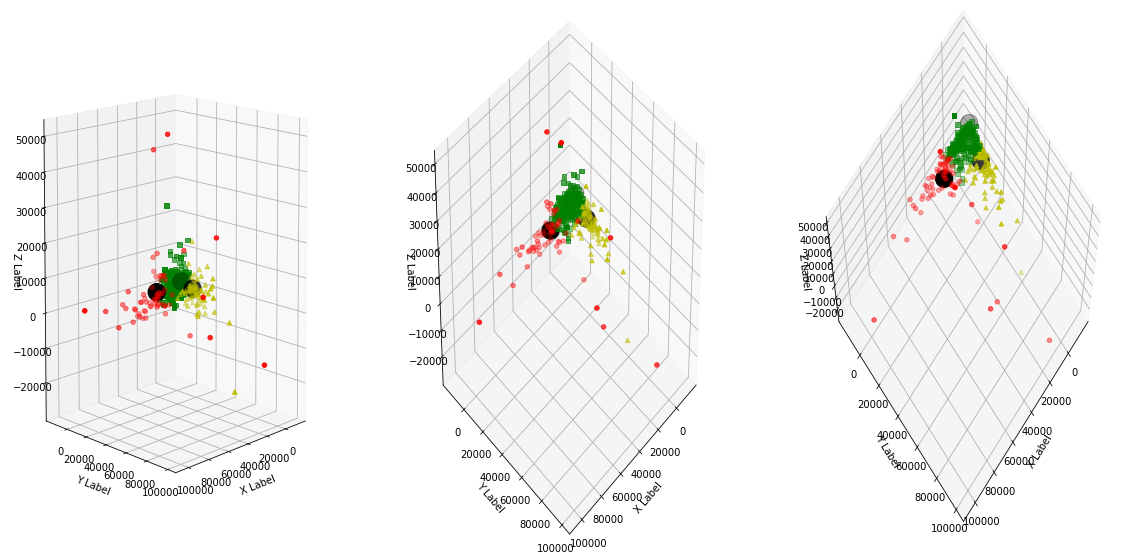

In [8]:
from __future__ import print_function
from numpy import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 导入数据
def loadDataSet(fileName,split=' '): 
    dataSet = []
    fr = open(fileName)
    next(fr)
    for line in fr.readlines() :
        curLine = line.strip().split(split)
        fltLine = list(map(float, curLine))  # 映射所有的元素为 float（浮点数）类型
        dataSet.append(fltLine)
#     print(array(dataSet)
    return array(dataSet)[:,2:8]

# 欧式距离
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))  # la.norm(vecA-vecB)

# 为给定数据集构建一个包含 k 个随机质心的集合。随机质心必须要在整个数据集的边界之内，这可以通过找到数据集每一维的最小和最大值来完成。然后生成 0~1.0 之间的随机数并通过取值范围和最小值，以便确保随机点在数据的边界之内。
def randCent(dataMat, k):
    n = shape(dataMat)[1]  # 列的数量
    centroids = mat(zeros((k, n)))  # 创建k个质心矩阵
    for j in range(n):  # 创建随机簇质心，并且在每一维的边界内
        minJ = min(dataMat[:, j])  # 最小值
        rangeJ = float(max(dataMat[:, j]) - minJ)  # 范围 = 最大值 - 最小值
        centroids[:, j] = mat(minJ + rangeJ * random.rand(k, 1))  # 随机生成
    return centroids

# k-means 聚类算法
# 该算法会创建k个质心，然后将每个点分配到最近的质心，再重新计算质心。
# 这个过程重复数次，知道数据点的簇分配结果不再改变位置。
# 运行结果（多次运行结果可能会不一样，可以试试，原因为随机质心的影响，但总的结果是对的， 因为数据足够相似，也可能会陷入局部最小值）
def kMeans(dataMat, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataMat)[0]  # 行数
    clusterAssment = mat(zeros((m, 2)))  # 创建一个与 dataMat 行数一样，但是有两列的矩阵，用来保存簇分配结果
    centroids = createCent(dataMat, k)  # 创建质心，随机k个质心
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):  # 循环每一个数据点并分配到最近的质心中去
            minDist = inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j, :],dataMat[i, :])  # 计算数据点到质心的距离
                if distJI < minDist:  # 如果距离比 minDist（最小距离）还小，更新 minDist（最小距离）和最小质心的 index（索引）
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:  # 簇分配结果改变
                clusterChanged = True  # 簇改变
                clusterAssment[i, :] = minIndex, minDist**2  # 更新簇分配结果为最小质心的 index（索引），minDist（最小距离）的平方
#         print(centroids,"\n")
        for cent in range(k):  # 更新质心
            ptsInClust = dataMat[nonzero(
                clusterAssment[:, 0].A == cent)[0]]  # 获取该簇中的所有点
            centroids[cent, :] = mean(
                ptsInClust, axis=0)  # 将质心修改为簇中所有点的平均值，mean 就是求平均值的
            
    return centroids, clusterAssment

# 二分 KMeans 聚类算法, 基于 kMeans 基础之上的优化，以避免陷入局部最小值
def biKMeans(dataMat, k, distMeas=distEclud):
    m = shape(dataMat)[0]
    clusterAssment = zeros((m, 2))  # 保存每个数据点的簇分配结果和平方误差
    centroid0 = mean(dataMat, axis=0).tolist()[0]  # 质心初始化为所有数据点的均值
    centList = [centroid0]  # 初始化只有 1 个质心的 list
    for j in range(m):  # 计算所有数据点到初始质心的距离平方误差
        clusterAssment[j, 1] = distMeas(mat(centroid0), dataMat[j, :])**2
    while (len(centList) < k):  # 当质心数量小于 k 时
        lowestSSE = inf
        for i in range(len(centList)):  # 对每一个质心
            ptsInCurrCluster = dataMat[nonzero(
                clusterAssment[:, 0] == i)[0], :]  # 获取当前簇 i 下的所有数据点
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)  # 将当前簇 i 进行二分 kMeans 处理
            sseSplit = sum(splitClustAss[:, 1])  # 将二分 kMeans 结果中的平方和的距离进行求和
            sseNotSplit = sum(
                clusterAssment[nonzero(clusterAssment[:, 0] != i)[0],1])  # 将未参与二分 kMeans 分配结果中的平方和的距离进行求和
            print("sseSplit, and notSplit: ", sseSplit, sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        # 找出最好的簇分配结果    
        bestClustAss[nonzero(bestClustAss[:, 0] == 1)[0], 0] = len(centList)  # 调用二分 kMeans 的结果，默认簇是 0,1. 当然也可以改成其它的数字
        bestClustAss[nonzero(bestClustAss[:, 0] == 0)[0], 0] = bestCentToSplit  # 更新为最佳质心
        print('the bestCentToSplit is: ', bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        # 更新质心列表
        centList[bestCentToSplit] = bestNewCents[0, :].tolist()[
            0]  # 更新原质心 list 中的第 i 个质心为使用二分 kMeans 后 bestNewCents 的第一个质心
        centList.append(
            bestNewCents[1, :].tolist()[0])  # 添加 bestNewCents 的第二个质心
        clusterAssment[nonzero(clusterAssment[:, 0] == bestCentToSplit)[
            0], :] = bestClustAss  # 重新分配最好簇下的数据（质心）以及SSE
    return mat(centList), clusterAssment


# 0-1 归一化
def noramlization(data):
    minVals = data.min(0)
    maxVals = data.max(0)
    ranges = maxVals - minVals
    normData = np.zeros(np.shape(data))
    m = data.shape[0]
    normData = data - np.tile(minVals, (m, 1))
    normData = normData/np.tile(ranges, (m, 1))
    return normData, ranges, minVals

#  PCA降维
def PCA_(data,dim=3):
    from sklearn.decomposition import PCA 
    pca = PCA(n_components=dim)#n_components=2,0.8
    pca.fit(data)
    data = pca.transform(data)
    return data

# 3D-2D可视化
def visualize(data_n3,labelsList,Centroids_k3,dim='3d'):
    data_n3 = array(data_n3)
    fig = plt.figure()
    color  = ['r','y','g']
    marker = ['o','^','s']
    if data_n3.shape[1] != Centroids_k3.shape[1]:
        return
    Classes =unique(labelsList)
    
    if Centroids_k3.shape[1] == 2:
        ax = fig.add_subplot(111)
        for i,Class in enumerate(Classes):
            dataTmp = []
            for idx,label in enumerate(labelsList):
                if(Class == label):
                    dataTmp.append(data_n3[idx,:].tolist())
            x = []
            y = []
            for row in dataTmp:
                x.append(row[0])
                y.append(row[1])
            ax.scatter(x,y, c=color[i], marker=marker[i])
            x = []
            y = []
            for row in Centroids_k3:
                x.append(row[0])
                y.append(row[1])
            ax.scatter(x,y, c='k',s = 300)
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        
    if Centroids_k3.shape[1] == 3:
        azim = 10
        plot = 130
        for ii in range(3):
            plot+=1
            ax = fig.add_subplot(plot, projection='3d')
            for i,Class in enumerate(Classes):
                dataTmp = []
                for idx,label in enumerate(labelsList):
                    if(Class == label):
                        dataTmp.append(data_n3[idx].tolist())
                x = []
                y = []
                z = []
                for row in dataTmp:
                    x.append(row[0])
                    y.append(row[1])
                    z.append(row[2])
                ax.scatter(x,y,z, c=color[i], marker=marker[i])
            x = []
            y = []
            z = []
            for row in Centroids_k3:
                x.append(row[0])
                y.append(row[1])
                z.append(row[2])
            ax.scatter(x,y,z, c='k',s = 300)
            ax.set_xlabel('X Label')
            ax.set_ylabel('Y Label')
            ax.set_zlabel('Z Label')
            ax.view_init(elev=azim,azim=45)
            azim+=30    
            fig = plt.gcf()
            fig.set_size_inches(20, 10)
    plt.show()
    

def testKMeans():
    from sklearn.decomposition import PCA
    # 加载测试数据集
    dataMat = loadDataSet('data/10.KMeans/testSet1.txt')
    print(dataMat.shape)
    # 创建k个质心，然后将每个点分配到最近的质心，再重新计算质心
    # 这个过程重复数次，直到数据点的簇分配结果不再改变位置。
    myCentroids, clustAssing = kMeans(dataMat, 3)
    dataMat = PCA_(dataMat,dim=3)
    print(dataMat.shape)
    visualize(dataMat[:,0:3],clustAssing[:,0].tolist(),myCentroids[:,0:3],dim='3d')
    print('centroids=', myCentroids)
    print('clustAssing=', clustAssing)

    
def testBiKMeans():
    # 加载测试数据集
    dataMat = mat(loadDataSet('data/10.KMeans/testSet1.txt'))
    
    dim_ = 3

    myCentroids, clustAssing = biKMeans(dataMat, dim_)
    print('myCentroids=', myCentroids)
#     print('clustAssing=', clustAssing)
    dataMat = PCA_(dataMat,dim=dim_)
    myCentroids = PCA_(myCentroids,dim=dim_)
    visualize(dataMat[:,0:dim_],clustAssing[:,0].tolist(),myCentroids,dim='2d')

    



if __name__ == "__main__":
#     dataMat = mat(loadDataSet('data/10.KMeans/testSet1.txt'))
#     print(dataMat)
    # 测试基础的函数
#     testBasicFunc()

    # 测试 kMeans 函数
#     testKMeans()

    # 测试二分 biKMeans 函数
    testBiKMeans()

sseSplit, and notSplit:  84147840668.45905 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  440
myCentroids= [[ 7944.112       5151.81866667  7536.128       2484.13066667
   2872.55733333  1214.26133333]
 [35401.36923077  9514.23076923 10346.36923077  6463.09230769
   2933.04615385  3316.84615385]]


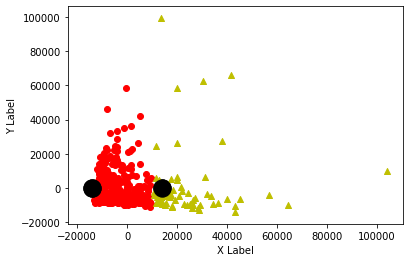

In [7]:
from __future__ import print_function
from numpy import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 导入数据
def loadDataSet(fileName,split=' '): 
    dataSet = []
    fr = open(fileName)
    next(fr)
    for line in fr.readlines() :
        curLine = line.strip().split(split)
        fltLine = list(map(float, curLine))  # 映射所有的元素为 float（浮点数）类型
        dataSet.append(fltLine)
#     print(array(dataSet)
    return array(dataSet)[:,2:8]

# 欧式距离
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))  # la.norm(vecA-vecB)

# 为给定数据集构建一个包含 k 个随机质心的集合。随机质心必须要在整个数据集的边界之内，这可以通过找到数据集每一维的最小和最大值来完成。然后生成 0~1.0 之间的随机数并通过取值范围和最小值，以便确保随机点在数据的边界之内。
def randCent(dataMat, k):
    n = shape(dataMat)[1]  # 列的数量
    centroids = mat(zeros((k, n)))  # 创建k个质心矩阵
    for j in range(n):  # 创建随机簇质心，并且在每一维的边界内
        minJ = min(dataMat[:, j])  # 最小值
        rangeJ = float(max(dataMat[:, j]) - minJ)  # 范围 = 最大值 - 最小值
        centroids[:, j] = mat(minJ + rangeJ * random.rand(k, 1))  # 随机生成
    return centroids

# k-means 聚类算法
# 该算法会创建k个质心，然后将每个点分配到最近的质心，再重新计算质心。
# 这个过程重复数次，知道数据点的簇分配结果不再改变位置。
# 运行结果（多次运行结果可能会不一样，可以试试，原因为随机质心的影响，但总的结果是对的， 因为数据足够相似，也可能会陷入局部最小值）
def kMeans(dataMat, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataMat)[0]  # 行数
    clusterAssment = mat(zeros((m, 2)))  # 创建一个与 dataMat 行数一样，但是有两列的矩阵，用来保存簇分配结果
    centroids = createCent(dataMat, k)  # 创建质心，随机k个质心
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):  # 循环每一个数据点并分配到最近的质心中去
            minDist = inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j, :],dataMat[i, :])  # 计算数据点到质心的距离
                if distJI < minDist:  # 如果距离比 minDist（最小距离）还小，更新 minDist（最小距离）和最小质心的 index（索引）
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:  # 簇分配结果改变
                clusterChanged = True  # 簇改变
                clusterAssment[i, :] = minIndex, minDist**2  # 更新簇分配结果为最小质心的 index（索引），minDist（最小距离）的平方
#         print(centroids,"\n")
        for cent in range(k):  # 更新质心
            ptsInClust = dataMat[nonzero(
                clusterAssment[:, 0].A == cent)[0]]  # 获取该簇中的所有点
            centroids[cent, :] = mean(
                ptsInClust, axis=0)  # 将质心修改为簇中所有点的平均值，mean 就是求平均值的
            
    return centroids, clusterAssment

# 二分 KMeans 聚类算法, 基于 kMeans 基础之上的优化，以避免陷入局部最小值
def biKMeans(dataMat, k, distMeas=distEclud):
    m = shape(dataMat)[0]
    clusterAssment = zeros((m, 2))  # 保存每个数据点的簇分配结果和平方误差
    centroid0 = mean(dataMat, axis=0).tolist()[0]  # 质心初始化为所有数据点的均值
    centList = [centroid0]  # 初始化只有 1 个质心的 list
    for j in range(m):  # 计算所有数据点到初始质心的距离平方误差
        clusterAssment[j, 1] = distMeas(mat(centroid0), dataMat[j, :])**2
    while (len(centList) < k):  # 当质心数量小于 k 时
        lowestSSE = inf
        for i in range(len(centList)):  # 对每一个质心
            ptsInCurrCluster = dataMat[nonzero(
                clusterAssment[:, 0] == i)[0], :]  # 获取当前簇 i 下的所有数据点
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)  # 将当前簇 i 进行二分 kMeans 处理
            sseSplit = sum(splitClustAss[:, 1])  # 将二分 kMeans 结果中的平方和的距离进行求和
            sseNotSplit = sum(
                clusterAssment[nonzero(clusterAssment[:, 0] != i)[0],1])  # 将未参与二分 kMeans 分配结果中的平方和的距离进行求和
            print("sseSplit, and notSplit: ", sseSplit, sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        # 找出最好的簇分配结果    
        bestClustAss[nonzero(bestClustAss[:, 0] == 1)[0], 0] = len(centList)  # 调用二分 kMeans 的结果，默认簇是 0,1. 当然也可以改成其它的数字
        bestClustAss[nonzero(bestClustAss[:, 0] == 0)[0], 0] = bestCentToSplit  # 更新为最佳质心
        print('the bestCentToSplit is: ', bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        # 更新质心列表
        centList[bestCentToSplit] = bestNewCents[0, :].tolist()[
            0]  # 更新原质心 list 中的第 i 个质心为使用二分 kMeans 后 bestNewCents 的第一个质心
        centList.append(
            bestNewCents[1, :].tolist()[0])  # 添加 bestNewCents 的第二个质心
        clusterAssment[nonzero(clusterAssment[:, 0] == bestCentToSplit)[
            0], :] = bestClustAss  # 重新分配最好簇下的数据（质心）以及SSE
    return mat(centList), clusterAssment


# 0-1 归一化
def noramlization(data):
    minVals = data.min(0)
    maxVals = data.max(0)
    ranges = maxVals - minVals
    normData = np.zeros(np.shape(data))
    m = data.shape[0]
    normData = data - np.tile(minVals, (m, 1))
    normData = normData/np.tile(ranges, (m, 1))
    return normData, ranges, minVals

#  PCA降维
def PCA_(data,dim=3):
    from sklearn.decomposition import PCA 
    pca = PCA(n_components=dim)#n_components=2,0.8
    pca.fit(data)
    data = pca.transform(data)
    return data

# 3D-2D可视化
def visualize(data_n3,labelsList,Centroids_k3,dim='3d'):
    data_n3 = array(data_n3)
    fig = plt.figure()
    color  = ['r','y','g']
    marker = ['o','^','s']
    if data_n3.shape[1] != Centroids_k3.shape[1]:
        return
    Classes =unique(labelsList)
    
    if Centroids_k3.shape[1] == 2:
        ax = fig.add_subplot(111)
        for i,Class in enumerate(Classes):
            dataTmp = []
            for idx,label in enumerate(labelsList):
                if(Class == label):
                    dataTmp.append(data_n3[idx,:].tolist())
            x = []
            y = []
            for row in dataTmp:
                x.append(row[0])
                y.append(row[1])
            ax.scatter(x,y, c=color[i], marker=marker[i])
            x = []
            y = []
            for row in Centroids_k3:
                x.append(row[0])
                y.append(row[1])
            ax.scatter(x,y, c='k',s = 300)
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        
    if Centroids_k3.shape[1] == 3:
        azim = 10
        plot = 130
        for ii in range(3):
            plot+=1
            ax = fig.add_subplot(plot, projection='3d')
            for i,Class in enumerate(Classes):
                dataTmp = []
                for idx,label in enumerate(labelsList):
                    if(Class == label):
                        dataTmp.append(data_n3[idx].tolist())
                x = []
                y = []
                z = []
                for row in dataTmp:
                    x.append(row[0])
                    y.append(row[1])
                    z.append(row[2])
                ax.scatter(x,y,z, c=color[i], marker=marker[i])
            x = []
            y = []
            z = []
            for row in Centroids_k3:
                x.append(row[0])
                y.append(row[1])
                z.append(row[2])
            ax.scatter(x,y,z, c='k',s = 300)
            ax.set_xlabel('X Label')
            ax.set_ylabel('Y Label')
            ax.set_zlabel('Z Label')
            ax.view_init(elev=azim,azim=45)
            azim+=30    
            fig = plt.gcf()
            fig.set_size_inches(20, 10)
    plt.show()
    

def testKMeans():
    from sklearn.decomposition import PCA
    # 加载测试数据集
    dataMat = loadDataSet('data/10.KMeans/testSet1.txt')
    print(dataMat.shape)
    # 创建k个质心，然后将每个点分配到最近的质心，再重新计算质心
    # 这个过程重复数次，直到数据点的簇分配结果不再改变位置。
    myCentroids, clustAssing = kMeans(dataMat, 3)
    dataMat = PCA_(dataMat,dim=3)
    print(dataMat.shape)
    visualize(dataMat[:,0:3],clustAssing[:,0].tolist(),myCentroids[:,0:3],dim='3d')
    print('centroids=', myCentroids)
    print('clustAssing=', clustAssing)

    
def testBiKMeans():
    # 加载测试数据集
    dataMat = mat(loadDataSet('data/10.KMeans/testSet1.txt'))
    
    dim_ = 2

    myCentroids, clustAssing = biKMeans(dataMat, dim_)
    print('myCentroids=', myCentroids)
#     print('clustAssing=', clustAssing)
    dataMat = PCA_(dataMat,dim=dim_)
    myCentroids = PCA_(myCentroids,dim=dim_)
    visualize(dataMat[:,0:dim_],clustAssing[:,0].tolist(),myCentroids,dim='2d')

    



if __name__ == "__main__":
#     dataMat = mat(loadDataSet('data/10.KMeans/testSet1.txt'))
#     print(dataMat)
    # 测试基础的函数
#     testBasicFunc()

    # 测试 kMeans 函数
#     testKMeans()

    # 测试二分 biKMeans 函数
    testBiKMeans()

$$ J_\alpha(x) = \sum_{m=0}^\infty \frac{(-1)^m}{m! \Gamma (m + \alpha + 1)} {\left({ \frac{x}{2} }\right)}^{2m + \alpha} \text {，独立公式示例} $$



* scsc $ (\sum_{i=1}^{m} a_i·label_i=0) $ddsd

In [13]:
$$ J_\alpha(x) = \sum_{m=0}^\infty \frac{(-1)^m}{m! \Gamma (m + \alpha + 1)} {\left({ \frac{x}{2} }\right)}^{2m + \alpha} \text {，独立公式示例} $$

$ \(\sum_{i=1}^{m} a_i\·label_i=0\) $

SyntaxError: invalid syntax (<ipython-input-13-13359b263857>, line 1)

   这两个 $\alpha $ 必须要在间隔边界之外
   这两个 $\alpha $ 还没有进行过区间化处理或者不在边界上。